# Predicting heart disease using machine learning

This notebook looks into using python-based machine learning and data science libraries in an attempt to build a machine learning model capable of  predicting whether or not someone has heart disease based on their medical attributes


* Problem definition
* Data
* Evaluation
* Features
* Modelling
* Experimentation

## 1. Problem definition
> Given clinical parameter about a patient, can we predict whether or not they have heart disease

## 2. DATA
The original data come from Cleavland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease

## EVALUATION

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease or not during the proof of concept, we can pursue the project.

## FEATURES                    .
** create data dictionary **

ATTRIBUTE INFORMATION
1.age (Age of the patient in years)  
2. sex (Male/Female)
3. cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic
4. trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital
5. chol (serum cholesterol in mg. 
6. fbs (if fasting blood sugar > 120 mg)
7. restecg (resting electrocardiographic r sults)
-- Values: [normal, stt abnormality, trophy]
thalach: maximum heart rate 9. a
9. chieved
exang: exercise-induced angina (Tru10. e
10. / False)
oldpeak: ST depression induced by exercise relati
11. ve to rest
12. slope: the slope of the peak exerciseST segment
ca: number of major vessels (0-3) colored by
13.  fluoroscopy thal: [normal; fixed defect; rever
14. num (predicted attribute)

                     
               
                                    ed attribute


In [1]:
# Import all the tools we need


# Regular EDA (Exploratory Data Analysis) and plotting
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st

#import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, recall_score, precision_score 
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

In [86]:
# Load Data
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

# Data exploratory Analysis
The goal is to find more about the data and become an expert in the subject matter on the datast you're working with

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types? (numeical or categorical)
3. What's missing from the data and how do you dael with it
4. What are the outliers and how do you deal with them
5. How can you add, change or deal with them to get more out of the data

In [87]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [88]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [89]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

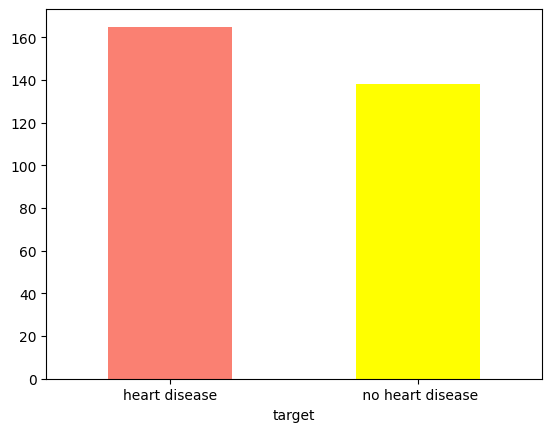

In [90]:
df['target'].value_counts().plot(kind= 'bar', color = ['salmon', 'yellow']);
plt.xticks([1, 0], [' no heart disease', 'heart disease'], rotation = False);

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [92]:
# Are there any missing value?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [93]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [94]:
# heart disease frquency with reards to target
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

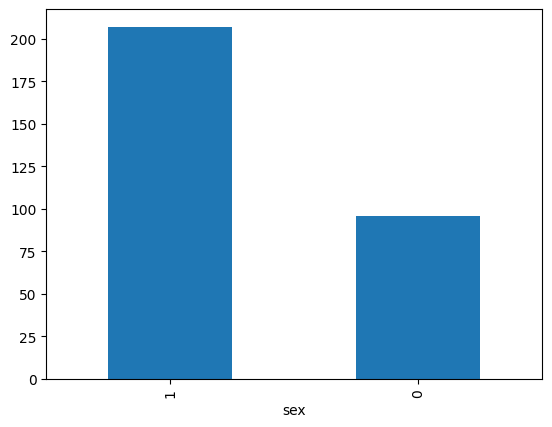

In [95]:
df.sex.value_counts().plot(kind = 'bar');

In [96]:
# comparing the sex column with the target column

pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


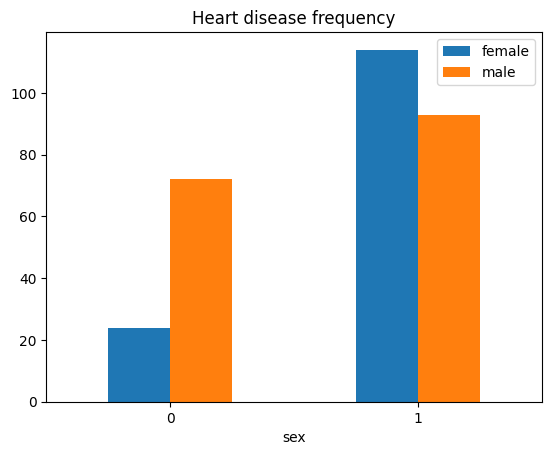

In [97]:
pd.crosstab(df['sex'], df['target']).plot(kind = 'bar')
plt.legend(['female', 'male'])
plt.title('Heart disease frequency')
plt.xticks(rotation = False)
plt.xlabel('sex');

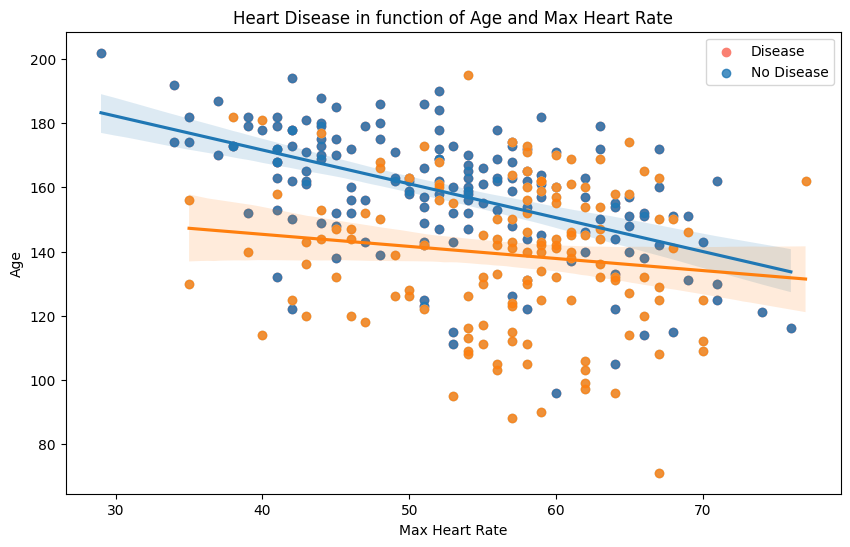

In [98]:
# Variation of age, thalac with target
plt.figure(figsize = (10, 6))
plt.scatter(df['age'][df['target']==1], df['thalach'][df['target']==1], 
            color='salmon');
sns.regplot(data = df, x= df['age'][df['target']==1], y = df['thalach'][df['target']==1], )
#scatter with negative examples
plt.scatter(df['age'][df['target']==0], df['thalach'][df['target']==0],
           c = 'lightblue', );
sns.regplot(data = df, x= df['age'][df['target']==0], y = df['thalach'][df['target']==0], )
plt.title('Heart Disease in function of Age and Max Heart Rate')
plt.ylabel('Age')
plt.xlabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])

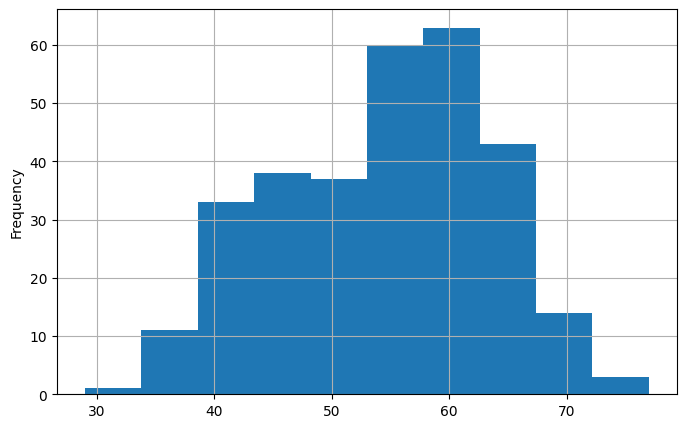

In [99]:
#Age Distribution
df.age.hist(grid = True, figsize = (8, 5));
plt.ylabel('Frequency');

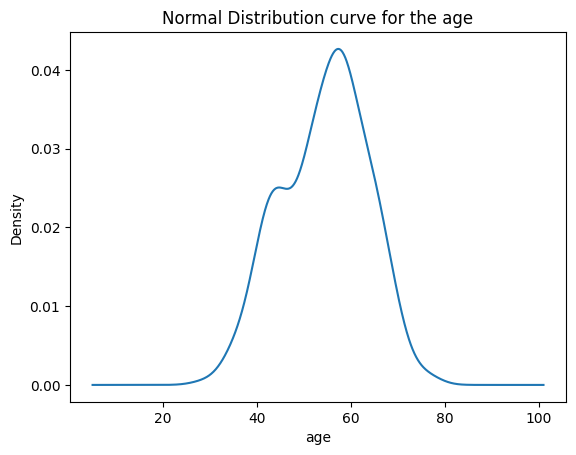

In [100]:
df.age.plot.density()
plt.title('Normal Distribution curve for the age')
plt.xlabel('age')
plt.show()

In [101]:
# Testing whether thw age sample is a normal distriibution using scipy
stat, p = st.shapiro(df.age)
print(p)
if p > 0.05:
    print('the sample looks Gaussian')
else:
    print('it is not a Gaussain distribution')


0.005800595041364431
it is not a Gaussain distribution


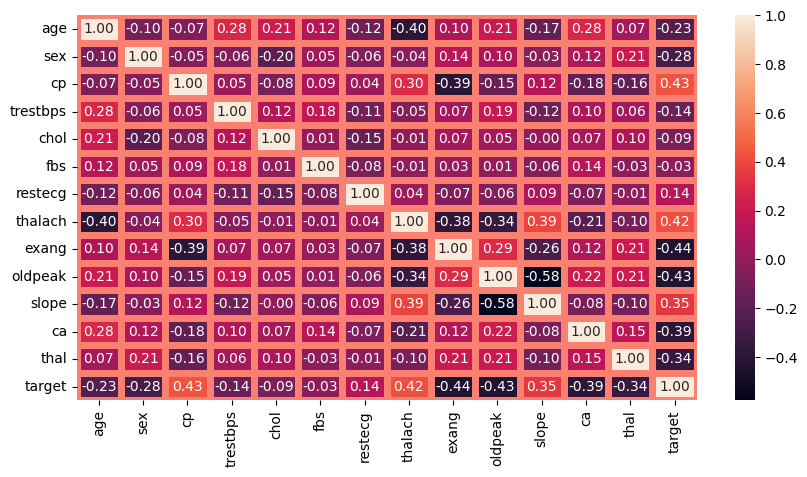

In [102]:
#Finding correlations between the features and target
corr = df.corr()
plt.figure(figsize = (10, 5))
sns.heatmap(corr, annot = True, linewidths = 5, linecolor = 'salmon' , fmt= '.2f' );

# Modelling

In [103]:
# Split into X and y
X = df.drop('target', axis = 1)
y= df['target']

In [104]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [105]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [106]:
model = {'LogisticRegression': LogisticRegression(), 
         'KNeighbors': KNeighborsClassifier(),
         'RandomForest': RandomForestClassifier()}
a = {}

for key, value in model.items():
    np.random.seed(42)
    value.fit(X_train, y_train)
    a[key]= value.score(X_test, y_test)
print(a)

    

C:\Users\ISLAMIC STUDY CENTRE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442, 'KNeighbors': 0.6885245901639344, 'RandomForest': 0.8360655737704918}


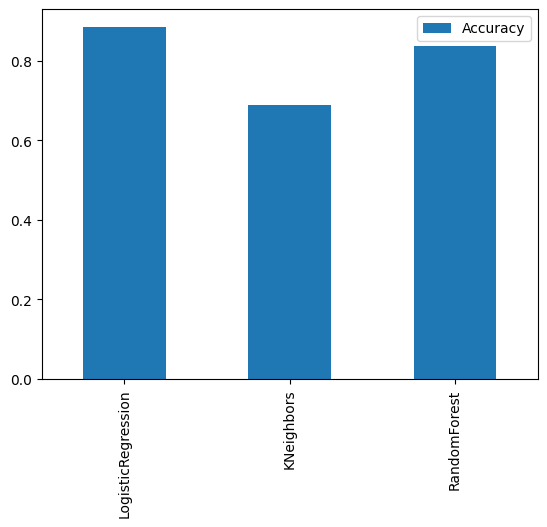

In [107]:
model_compare = pd.DataFrame(a, index = ['Accuracy'])
model_compare.T.plot(kind= 'bar');

# After determining the baseline model... the next step should be:
1. Hyperparameter Tuning
2. Feature Importance
3. Confusion Matrix
4. Cross validation
5. Precision
6.recall
7.F1 Score
8. Classification report
9. ROC curve (AUC)

In [108]:
# Hyperparameter tuning
train_score = {}
test_score ={}
n_neighbors = np.arange(1, 20, 1)
for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    train_score[n]=knn.score(X_train, y_train)
    test_score[n] = knn.score(X_test, y_test)

    

In [109]:
train_score


{1: 1.0,
 2: 0.8099173553719008,
 3: 0.7727272727272727,
 4: 0.743801652892562,
 5: 0.7603305785123967,
 6: 0.7520661157024794,
 7: 0.743801652892562,
 8: 0.7231404958677686,
 9: 0.71900826446281,
 10: 0.6942148760330579,
 11: 0.7272727272727273,
 12: 0.6983471074380165,
 13: 0.6900826446280992,
 14: 0.6942148760330579,
 15: 0.6859504132231405,
 16: 0.6735537190082644,
 17: 0.6859504132231405,
 18: 0.6652892561983471,
 19: 0.6818181818181818}

In [110]:
test_score

{1: 0.6229508196721312,
 2: 0.639344262295082,
 3: 0.6557377049180327,
 4: 0.6721311475409836,
 5: 0.6885245901639344,
 6: 0.7213114754098361,
 7: 0.7049180327868853,
 8: 0.6885245901639344,
 9: 0.6885245901639344,
 10: 0.7049180327868853,
 11: 0.7540983606557377,
 12: 0.7377049180327869,
 13: 0.7377049180327869,
 14: 0.7377049180327869,
 15: 0.6885245901639344,
 16: 0.7213114754098361,
 17: 0.6885245901639344,
 18: 0.6885245901639344,
 19: 0.7049180327868853}

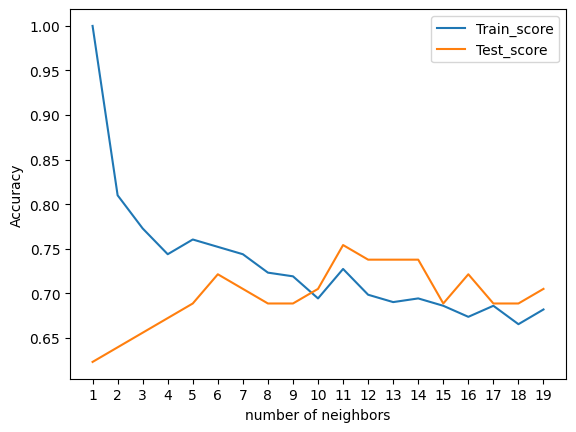

In [111]:
# Plotting the train and test
plt.plot(train_score.keys(), train_score.values(), label = 'Train_score');
plt.plot(test_score.keys(), test_score.values(), label = 'Test_score')
plt.legend()
plt.xlabel('number of neighbors')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1,20,1))
plt.show()

# Hyperparameters using RandomizedSearchCv
# We're going to tune:
  * LogisticRegresssion
  * RandomForsetClasssifier 
......using RandomizesSearchCv


In [112]:
#Creating a logistic regression hyperparameter
param_log =  {'C': np.logspace(-4, 4, 20), 'solver': ['liblinear']}

In [113]:
#creating a random classifier() hyperparameter
param_rand = {'n_estimators': [25, 50, 100, 150, 200], 'max_features': ['sqrt', 'log2', None], 'max_depth': [3, 6, 9], 'max_leaf_nodes': [3, 6, 9, 12]}

In [114]:
# Hyperparameter Tuning random search
np.random.seed(42)
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions= param_rand, cv =5, verbose = True, n_iter = 20)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [3, 6, 9],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [3, 6, 9, 12],
                                        'n_estimators': [25, 50, 100, 150,
                                                         200]},
                   verbose=True)

In [115]:
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=3)


In [116]:
random_search.score(X_test, y_test)

0.8688524590163934

In [117]:
# Hyperparameter Tuning using Logistic Regression
np.random.seed(42)
random_log = RandomizedSearchCV(LogisticRegression(), param_distributions= param_log, cv =5, n_iter = 20, verbose = True )
random_log.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [118]:
print(random_log.best_estimator_)

LogisticRegression(C=0.23357214690901212, solver='liblinear')


In [119]:
random_log.score(X_test, y_test)

0.8852459016393442

In [120]:
# Hyperparameter tuning using Grid search cv
grid_logistic = {'C': np.logspace(-4, 4, 40), 'solver': ['liblinear']}
np.random.seed(42)
grid = GridSearchCV(LogisticRegression(), param_grid = grid_logistic,  cv = 5, verbose = True)
#Fit grid hyperparammeter search model

grid.fit(X_train, y_train)
print(grid.best_params_)
grid.score(X_test, y_test)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'C': 0.19144819761699575, 'solver': 'liblinear'}


0.8852459016393442

# Evaluating our tuned machine model beyond accuracy
## ROC Curve and AUC score

In [121]:
# To make comparison and evaluate oyr trained model
pred =grid.predict(X_test)

In [122]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

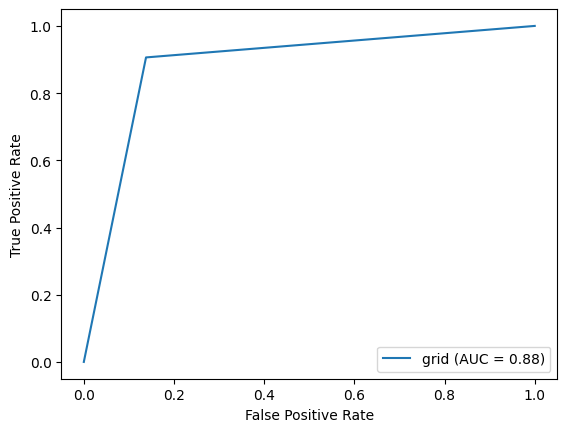

In [123]:
#Plot ROC curve and calculate AUC
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='grid')
display.plot()
plt.show()

In [124]:
# Confusion Matrix
data =confusion_matrix(y_test, pred)
data

array([[25,  4],
       [ 3, 29]], dtype=int64)

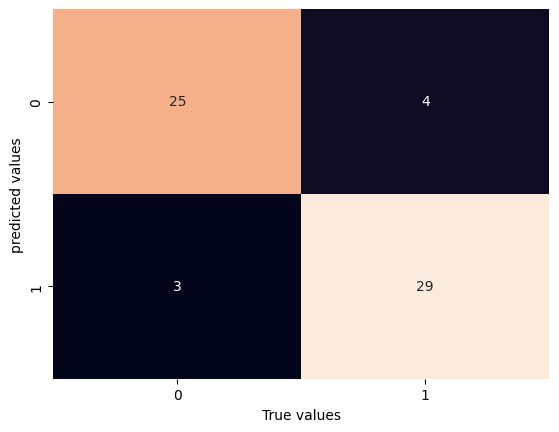

In [125]:
sns.heatmap(data = data, annot =True, cbar= False)
plt.ylabel('predicted values')
plt.xlabel('True values')
plt.show()

In [126]:
#Classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Calculate evaluation metrics using cross validation

## we are going to calculate precision, recall, f1-score using cross validation`

In [127]:
# check best hyperparameters 
print(random_log.best_estimator_)

LogisticRegression(C=0.23357214690901212, solver='liblinear')


In [128]:
#create a new classifier with the best param
clr = LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [129]:
# cross validated accuracy
cv_acc = cross_val_score(clr, X, y, cv=5, scoring = 'accuracy' )
cv_acc = np.mean(cv_acc)

In [130]:
# cross validated recall\
cv_recall = cross_val_score(clr, X, y, cv = 5 , scoring = 'recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [131]:
# cross validated F1 score
cv_f1 = cross_val_score(clr, X, y, cv = 5 , scoring = 'f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

In [132]:
# cross precision
cv_precision = cross_val_score(clr, X, y, cv = 5 , scoring = 'precision')
cv_precision = np.mean(cv_precision)
cv_precision




0.8215873015873015

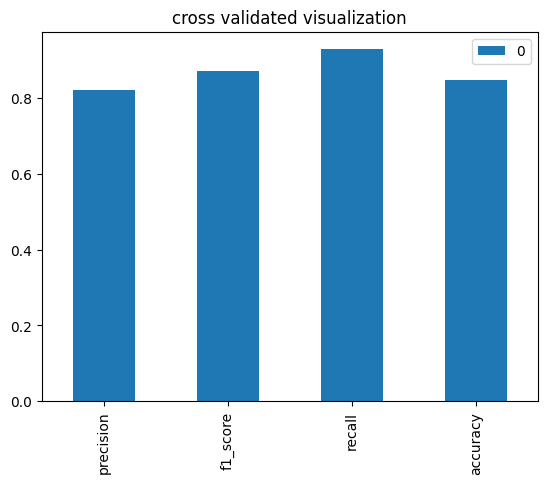

In [133]:
# cross validated visualization
df1 = pd.DataFrame({'precision': cv_precision, 'f1_score': cv_f1, 'recall': cv_recall, 'accuracy': cv_acc}, index = [0])
df1.T.plot(kind = 'bar', title = 'cross validated visualization', )
plt.show()


# FEATURE IMPORTANCE
### It determines which of the features has the most contribution to the outcome of the model 

In [134]:
clr.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [135]:
clr.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [154]:
feat = dict(zip(df.columns, clr.coef_[0]))

In [155]:
feat

{'age': 0.0036992207735222936,
 'sex': -0.9042409027676933,
 'cp': 0.6747282591013247,
 'trestbps': -0.011613401311995881,
 'chol': -0.001703643974904055,
 'fbs': 0.04787688089306608,
 'restecg': 0.3349019821325941,
 'thalach': 0.024729382907772574,
 'exang': -0.6312040609811942,
 'oldpeak': -0.5759095019287949,
 'slope': 0.4709514064291035,
 'ca': -0.6516534774104941,
 'thal': -0.6998420760932893}

In [159]:
df2 = pd.DataFrame(data = feat, index = [0] )

<Axes: title={'center': 'Importance of Each Feature to the Model'}>

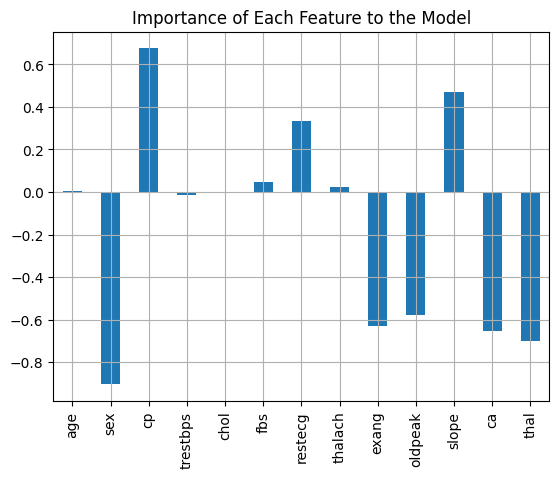

In [164]:
df2.T.plot(kind = 'bar', title = 'Importance of Each Feature to the Model', grid = True, legend = False )

[array([ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208])]

In [50]:
# web scrapping
import requests
import json

In [51]:
from bs4 import BeautifulSoup
import pprint

In [52]:
response = requests.get('https://news.ycombinator.com/news', timeout = 30)

ConnectionError: HTTPSConnectionPool(host='news.ycombinator.com', port=443): Max retries exceeded with url: /news (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000000F9540CCC50>: Failed to resolve 'news.ycombinator.com' ([Errno 11001] getaddrinfo failed)"))

In [ ]:
soup = BeautifulSoup(response.text, 'html.parser' )

In [ ]:
links = soup.select('.athing')
subtext = soup.select('.subtext')


def sep_r(links, subtext):
    hacker = []
    for idx, val in enumerate(links):
        title= val.getText()
        href= val.get('href')
        vote = subtext[idx].select('.score')
        if len(vote):
            points = int(vote[0].getText().replace(' points', " "))
            if points > 99:
                hacker.append({'title': title, 'link': href, 'votes': points})
       
    return hacker
pprint.pprint(sep_r(links, subtext))

        


In [83]:
#API calls
import requests
import json
response = requests.get('https://swapi.dev/api/people', timeout = 20)
#print(response.status_code)
data = response.text
parse_json = json.loads(data)
print(parse_json['results'][0]['films'])

    




ConnectionError: HTTPSConnectionPool(host='swapi.dev', port=443): Max retries exceeded with url: /api/people (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000000889476CA50>: Failed to resolve 'swapi.dev' ([Errno 11001] getaddrinfo failed)"))